In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('./data/gemstone.csv')
df.drop('id', axis=1, inplace=True)
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 10 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   carat    193573 non-null  float64
 1   cut      193573 non-null  object 
 2   color    193573 non-null  object 
 3   clarity  193573 non-null  object 
 4   depth    193573 non-null  float64
 5   table    193573 non-null  float64
 6   x        193573 non-null  float64
 7   y        193573 non-null  float64
 8   z        193573 non-null  float64
 9   price    193573 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 14.8+ MB


In [4]:
df.isnull().sum()


carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df.describe()


,carat,depth,table,x,y,z,price
count,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000
mean,0.790688,61.820574,57.227675,5.715312,5.720094,3.534246,3969.155414
std,0.462688,1.081704,1.918844,1.109422,1.102333,0.688922,4034.374138
min,0.200000,52.100000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.300000,56.000000,4.700000,4.710000,2.900000,951.000000
50%,0.700000,61.900000,57.000000,5.700000,5.720000,3.530000,2401.000000
75%,1.030000,62.400000,58.000000,6.510000,6.510000,4.030000,5408.000000
max,3.500000,71.600000,79.000000,9.650000,10.010000,31.300000,18818.000000


In [7]:
numerical = [x for x in df.columns if df[x].dtypes != 'object']
categorical = [x for x in df.columns if df[x].dtypes == 'object']

print(numerical,categorical)

['carat', 'depth', 'table', 'x', 'y', 'z', 'price'] ['cut', 'color', 'clarity']


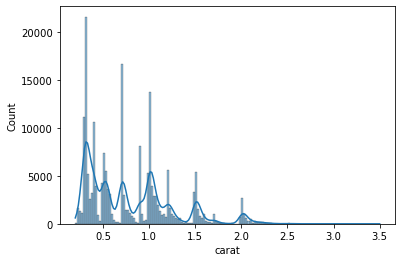

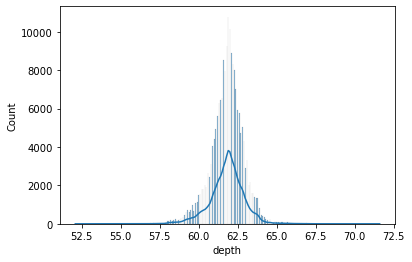

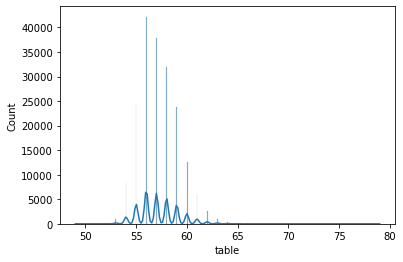

KeyboardInterrupt: 

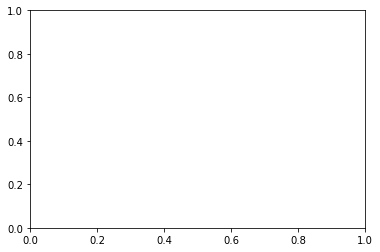

In [8]:
for i in numerical:
    sns.histplot(df, x = i, kde=True)
    plt.show()

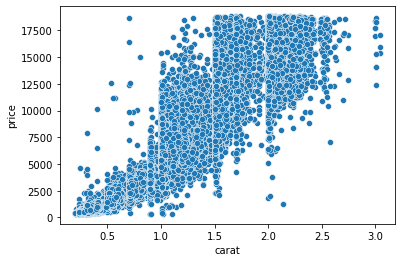

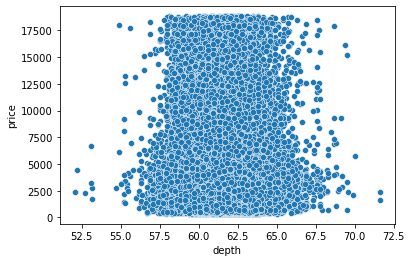

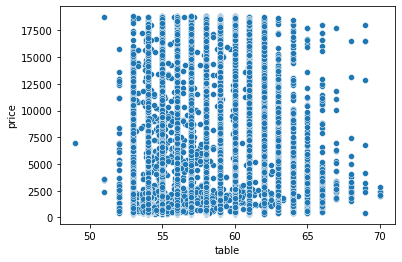

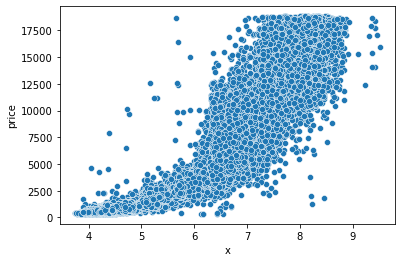

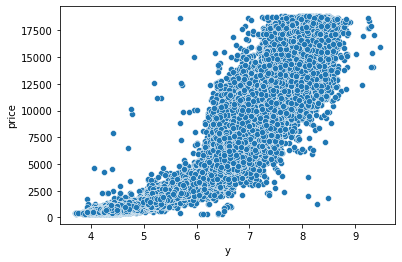

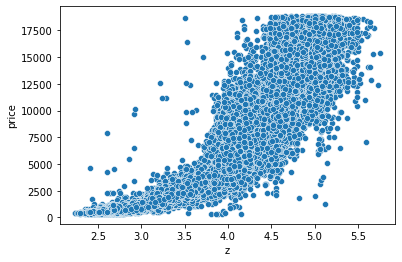

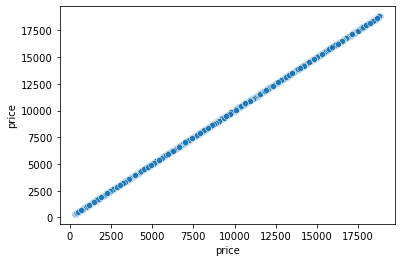

In [ ]:
for i in numerical:
    sns.scatterplot(x = df[i],y = df['price'])
    plt.show()

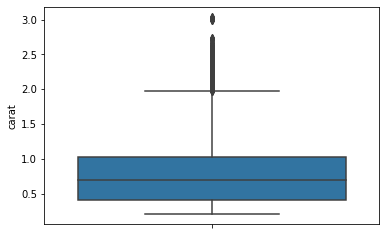

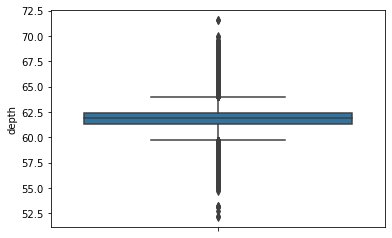

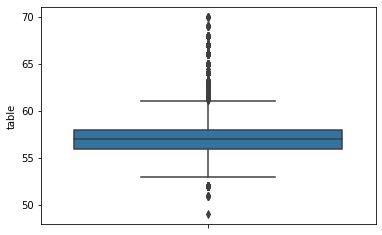

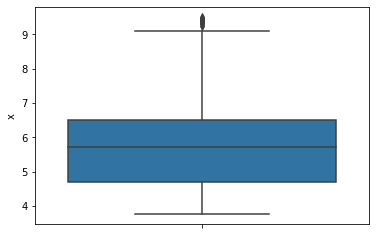

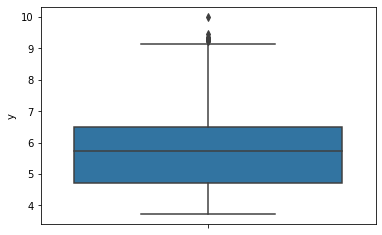

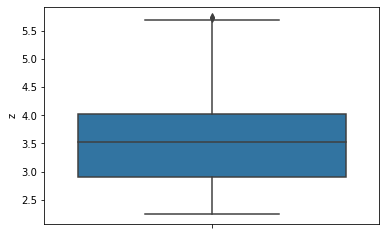

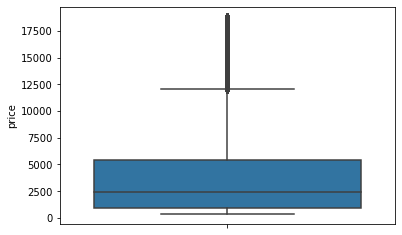

In [ ]:
for i in numerical:
    sns.boxplot(y = df[i])
    plt.show()

In [9]:
for i in categorical:
    print(df[i].value_counts())


Ideal        92454
Premium      49910
Very Good    37566
Good         11622
Fair          2021
Name: cut, dtype: int64
G    44391
E    35869
F    34258
H    30799
D    24286
I    17514
J     6456
Name: color, dtype: int64
SI1     53272
VS2     48027
VS1     30669
SI2     30484
VVS2    15762
VVS1    10628
IF       4219
I1        512
Name: clarity, dtype: int64


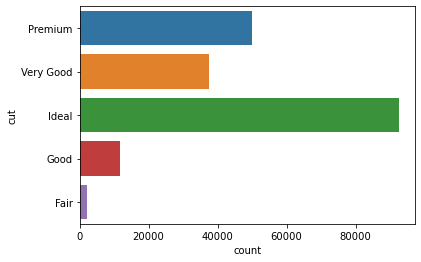

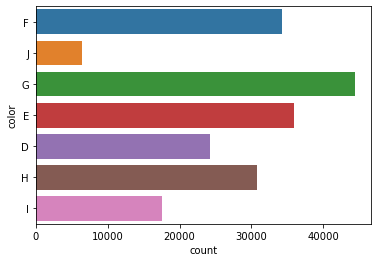

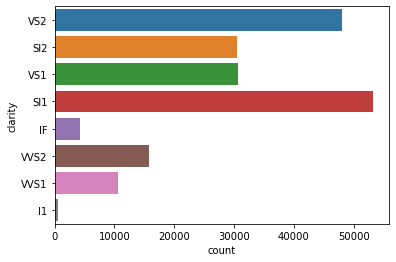

In [ ]:
for i in categorical:
    sns.countplot(y = df[i])
    plt.show()

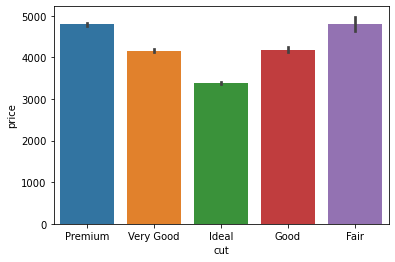

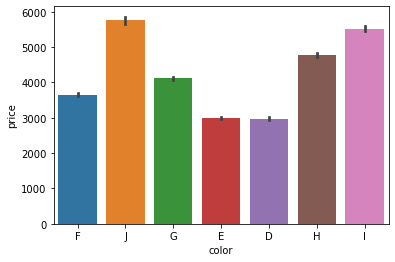

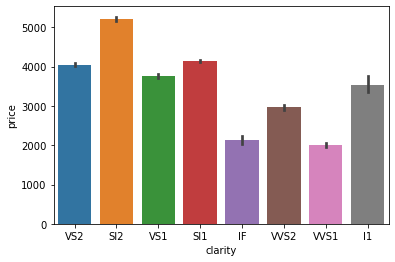

In [ ]:
for i in categorical:
    sns.barplot(x = df[i], y = df['price'])
    plt.show()

<AxesSubplot:>

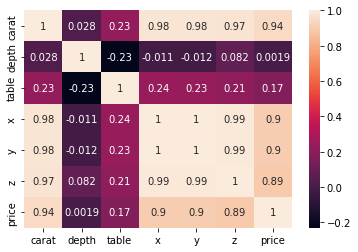

In [10]:
sns.heatmap(df[numerical].corr(),annot=True)

Dimensionity Reduction

In [ ]:
# df = df.drop(columns=['x','y','z'], axis=1)

# Treat the outliers as we have lots of data so we can just remove the data 

In [11]:

df = df[~(df['z']>8)]
df = df[~(df['z']<2)]
df = df[~(df['y']<3)]
df = df[~(df['y']>10)]
df = df[~(df['x']<1)]
df = df[~(df['table']>70)]
df = df[~(df['carat']>3.1)]


In [12]:
df.describe()

,carat,depth,table,x,y,z,price
count,193553.000000,193553.000000,193553.000000,193553.000000,193553.000000,193553.000000,193553.000000
mean,0.790585,61.820549,57.227321,5.715215,5.719964,3.534187,3968.503402
std,0.462510,1.081482,1.917706,1.109008,1.101988,0.685252,4033.509245
min,0.200000,52.100000,49.000000,3.750000,3.710000,2.240000,326.000000
25%,0.400000,61.300000,56.000000,4.700000,4.710000,2.900000,950.000000
50%,0.700000,61.900000,57.000000,5.700000,5.720000,3.530000,2401.000000
75%,1.030000,62.400000,58.000000,6.510000,6.510000,4.030000,5407.000000
max,3.040000,71.600000,70.000000,9.510000,9.460000,5.750000,18818.000000


# Mapping the catagorical variables

In [13]:
for i in categorical:
    print(i, " : ", df[i].unique())

cut  :  ['Premium' 'Very Good' 'Ideal' 'Good' 'Fair']
color  :  ['F' 'J' 'G' 'E' 'D' 'H' 'I']
clarity  :  ['VS2' 'SI2' 'VS1' 'SI1' 'IF' 'VVS2' 'VVS1' 'I1']


In [14]:
cut_map={"Fair":1,"Good":2,"Very Good":3,"Premium":4,"Ideal":5}
color_map = {"D":1 ,"E":2 ,"F":3 , "G":4 ,"H":5 , "I":6, "J":7}
clarity_map = {"I1":1,"SI2":2 ,"SI1":3 ,"VS2":4 , "VS1":5 , "VVS2":6 , "VVS1":7 ,"IF":8}

In [15]:
df['cut']=df['cut'].map(cut_map)
df['clarity'] = df['clarity'].map(clarity_map)
df['color'] = df['color'].map(color_map)

In [16]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,4,3,4,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,3,7,2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,5,4,5,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,5,4,5,61.6,56.0,4.38,4.41,2.71,666
4,1.70,4,4,4,62.6,59.0,7.65,7.61,4.77,14453


In [17]:
df.to_csv('../artifacts/eda_gemstone.csv', index=False)